c:\Users\FRANK\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Comenzando entrenamiento
Modelo entrenado


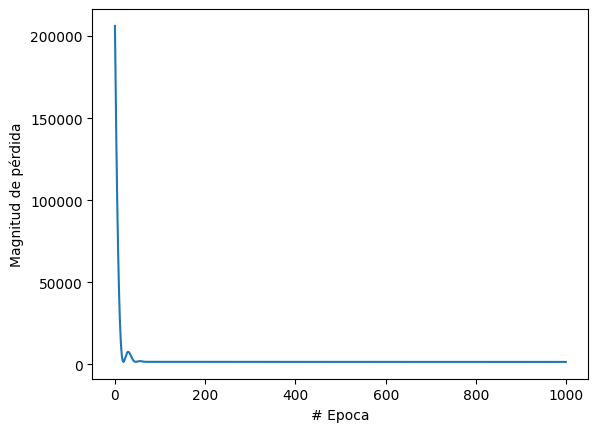

Vamos a hacer una predicción
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
El resultado es 47.188946 Fahrenheit


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Crear un rango de temperaturas en Kelvin
kelvin_temps = np.array([233.15, 263.15, 273.15, 281.15, 288.15, 295.15, 310.15], dtype=float)

# Convertir las temperaturas Kelvin a Fahrenheit
fahrenheit_temps_from_kelvin = np.array([-40, 14, 32, 46.4, 59, 71.6, 98.6], dtype=float)

# Crear el DataFrame
new_temperature_data_practice = pd.DataFrame({
    'Kelvin': kelvin_temps,
    'Fahrenheit': fahrenheit_temps_from_kelvin
})

# Definir el modelo simplificado con menos capas
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])
modelo.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error')

# Entrenar el modelo
print('Comenzando entrenamiento')
historial = modelo.fit(new_temperature_data_practice['Kelvin'], new_temperature_data_practice['Fahrenheit'], epochs=1000, verbose=False)
print('Modelo entrenado')

# Graficar la pérdida
plt.xlabel('# Epoca')
plt.ylabel('Magnitud de pérdida')
plt.plot(historial.history['loss'])
plt.show()

# Realizar una predicción
print('Vamos a hacer una predicción')
input_kelvin = 300.0
resultado = modelo.predict(np.array([[input_kelvin]]))  # Realizar una predicción para 300 Kelvin
print('El resultado es ' + str(resultado[0][0]) + ' Fahrenheit')
